In [1]:
import matplotlib.pyplot as plt

import pickle
import numpy as np

In [2]:
with open('sensitive_analysis_1v_100.pkl','r') as inputs:
    data = pickle.load(inputs)

with open('sensitive_analysis_base_renewal.pkl','r') as inputsbase:
    data_base = pickle.load(inputsbase)

In [10]:
a450_list= list()
for item in data:
    a450_list.append(item[1][0][0])
    

In [11]:
def get_price_stat_ave(data,decision_times): #period average for each sample
    mitigation = []
    utility = []
    price = []
    a650 = []
    from tree import TreeModel 
    for i in range(len(data)): #load corresponding results
        mitigation.append(data[i][-3])
        utility.append(data[i][-2])
        price.append(data[i][-1])
        #a650.append(data[i][2])
    #print(np.mean(a650))
    
    t = TreeModel(decision_times)
    nodes_index = []
    for i in range(t.num_periods):
        nodes_index.append(t.get_nodes_in_period(i)) #get nodes for slicing
    price_stat_ave = np.zeros((len(data), t.num_periods))
    for i in range(len(data)):
        for j in range(t.num_periods):
            price_stat_ave[i,j] = np.average(data[i][-1][nodes_index[j][0]:nodes_index[j][1]+1])
    return price_stat_ave


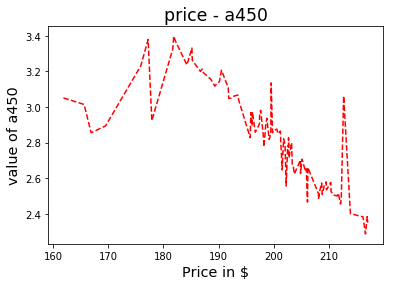

In [16]:
decision_times=[0, 15, 45, 85, 185, 285, 385]
price_stat_ave= get_price_stat_ave(data,decision_times)
ziped_list = zip(a450_list,price_stat_ave[:,0])
ziped_list.sort(key = lambda t: t[1])
target_list = ziped_list[5:95]
target_list_ori = zip(*target_list)

list_min,list_max = get_90_quantile(price_stat_ave)
plt.figure()
plt.plot(target_list_ori[1],target_list_ori[0], 'r--')
plt.title('price - a450', size ='xx-large')
plt.ylabel('value of a450', size = 'x-large')
plt.xlabel('Price in $', size = 'x-large')
plt.show()
plt.savefig('price - a450')
#plt.xlim(decision_times)

In [ ]:
import matplotlib.pyplot as plt

import pickle
import numpy as np

In [6]:
with open('sensitive_analysis_2G_100.pkl','r') as inputs:
    data = pickle.load(inputs)

with open('sensitive_analysis_base_renewal.pkl','r') as inputsbase:
    data_base = pickle.load(inputsbase)

In [ ]:
from scipy.odr import Model, Data, ODR
def sensitivity_analysis_c_k(ind):
    '''take fraction GHG reduction for different taxation rate from normal distribution
    returns the modified c and k in project description page 2 equation (2.3)'''
    #1.2 dollar = 1 euro
    xdata = [60*1.2,100*1.2]
    a = np.random.normal(0.543,0.0213)
    b = np.random.normal(0.671,0.0213)
    if ind == 0:
        ydata = [a,0.671]
    elif ind ==1:
        ydata = [0.543,b]
    else:
        ydata = [a,b]
    def f(p, x):
        '''Linear function y = m*x + b'''
        # B is a vector of the parameters.
        # x is an array of the current x values.
        # x is in the same format as the x passed to Data or RealData.
        #
        # Return an array in the same format as y passed to Data or RealData.
        return p[0] * x ** p[1]

    linear = Model(f)
    #sx, sy are arrays of error estimates
    mydata = Data(xdata, ydata)
    #beta0 are the initial parameter estimates
    myodr = ODR(mydata, linear, beta0=[1, -1.0])
    myoutput = myodr.run()
    x = myoutput.beta
    c= (1/x[1])*(x[1]+1) 
    g= ((1/(x[0]**(1/x[1])))**(x[1]+1) )*(x[0]-x[0]/(x[1]+1))
    return a,b,c,g

In [3]:
p_list = list()
for item in data:
    p_list.append(item[1])

NameError: name 'data' is not defined

In [ ]:
p_list=[[4.359888009237514, 128.49900502558569],
 [3.256337992103505, 87.697631163625559],
 [3.697761559796065, 101.12088460651056],
 [3.4502255410740506, 93.17124206405893],
 [3.5123044465725806, 95.06188902327311],
 [3.6682588685634347, 100.11424603359202],
 [3.5936364261010216, 97.639980715320291],
 [3.4015012213830214, 91.735568933881979],
 [3.1393449013129593, 84.693975204261534],
 [3.259804181851498, 87.789581086866733],
 [3.9648139619516605, 111.01491884060036],
 [3.0069802324662898, 81.555335127353715],
 [3.103001384352612, 83.805244884219817],
 [3.597794490309991, 97.7767532193444],
 [3.9324012856290813, 109.73572905128924],
 [3.1893689841043407, 85.95063410861016],
 [3.462163554229926, 93.529926680895016],
 [3.797822188911538, 104.65915556452796],
 [3.3330475988439514, 89.787463495483763],
 [3.142964444973019, 84.783573384308085],
 [3.7050809172119195, 101.37329249185296],
 [3.1710780120680853, 85.485401082308528],
 [2.9310209668742386, 79.876927617035733],
 [3.3129163281806893, 89.228567272338296],
 [4.585558773791521, 140.22742565685007],
 [3.0104658139639984, 81.635588963000998],
 [3.0599552866216686, 82.777632354330478],
 [3.6825730095160507, 100.60086069859697],
 [4.13764486064706, 118.21714915715087],
 [4.240923202155397, 122.84652676178541],
 [3.8196669769632385, 105.45926070741335],
 [3.3591116467905175, 90.519481616943395],
 [3.4043432030068774, 91.818357479838028],
 [3.5721479730016417, 96.947274888677683],
 [3.771682576018738, 103.7174418493137],
 [4.265922846084322, 124.00530014717482],
 [3.3893459070002985, 91.384269398727355],
 [3.5359577703787766, 95.798406526235667],
 [3.3270167768244483, 89.619462433898121],
 [3.588329979406444, 97.468639819201854],
 [3.1210089882677896, 84.242016121531776],
 [3.9985413215339816, 112.36801234509356],
 [3.2981116796315213, 88.82316700618658],
 [3.409939037819015, 91.981947049550385],
 [3.1780249152061057, 85.661133117321882],
 [3.2342454456789285, 87.113539805055723],
 [3.5013067947467276, 94.721816609719298],
 [3.900018988981644, 108.48080074675188],
 [3.4731033227358483, 93.859881147000266],
 [2.904987009347238, 79.322205174852542],
 [3.1212428152343934, 84.248159192395306],
 [4.048238894449824, 114.40937324310414],
 [3.212909249200929, 86.555628912307327],
 [3.390345744096364, 91.412980318316116],
 [3.7311479459223174, 102.27955582502591],
 [3.5373902596540496, 95.843586614463959],
 [4.045462145008361, 114.29311921993803],
 [3.3628464882101503, 90.625111903027715],
 [3.007164835666851, 81.560420075548379],
 [3.3898460027865043, 91.397729305703578],
 [3.391806742868406, 91.455889290956947],
 [3.1686393952257337, 85.42518089806434],
 [3.716496755094939, 101.76856874888011],
 [3.362120950922368, 90.605488642988732],
 [3.8301532485939074, 105.84645848718647],
 [3.76776308191818, 103.57585622962888],
 [3.2625673697016984, 87.862619082338441],
 [3.164099680822614, 85.309699964004395],
 [3.489484596149651, 94.35920995203179],
 [3.833517232992686, 105.97013660213774],
 [3.580332314292451, 97.209767931799007],
 [3.054064498116872, 82.640694039610551],
 [3.574374423432069, 97.019162720283376],
 [3.4238548896254044, 92.390372445019352],
 [3.8474637294142977, 106.49007559968004],
 [3.3046626640046406, 89.003389582737043],
 [3.236759524073534, 87.178096914046577],
 [3.4199362197717154, 92.274996812054127],
 [2.953043633279854, 80.354308064995124],
 [3.6668893112047756, 100.06781352750552],
 [3.1840765957182002, 85.816414447996777],
 [2.9080717452532565, 79.387518645770001],
 [4.399812372826607, 130.47632511805455],
 [3.261495207527553, 87.834023962837207],
 [3.998697367726351, 112.37492051925079],
 [3.4305362664885823, 92.587277753037696],
 [3.30174041028365, 88.921669029934904],
 [3.0974921321072495, 83.671666434904921],
 [3.8463237554012086, 106.44589935572174],
 [3.583084269140891, 97.300172138076491],
 [3.078664307365976, 83.221867747543726],
 [3.3870815250893282, 91.319316267371718],
 [3.47203626298017, 93.827851146008527],
 [3.5079461791466113, 94.92704935991641],
 [3.265489305203789, 87.942175794359514],
 [2.923975825741972, 79.724562696478699],
 [3.5352128915039254, 95.775443690907679],
 [2.9501319006748488, 80.290519267357141],
 [3.764171787530471, 103.4477088283664],
 [4.041741663345652, 114.13904219611082]]

In [ ]:
count = 0
result_list = list()
while count < 300000:
    for item in p_list:
        a,b,c,g = sensitivity_analysis_c_k(1)
        if abs(c-item[0])<0.001 and abs(g-item[1])<0.001:
            result_list.append((0.543,b,item[0],item[1]))
            p_list.remove(item)
    count += 1